# Nodebook - Interact with models from Hugging Face

## Prerequisites

Create the `sh` helper function.

In [1]:
var { spawn } = require('child_process');
var sh = (cmd) => {
    $$.async();
    var sp = spawn(cmd, { cwd: process.cwd(), stdio: 'pipe', shell: true, encoding: 'utf-8' });
    sp.stdout.on('data', data => console.log(data.toString()));
    sp.stderr.on('data', data => console.error(data.toString()));
    sp.on('close', () => $$.done());
};

Install some Node.js modules
* [esm-hook](https://www.npmjs.com/package/esm-hook) to use ESM modules with zero setup
* [dotenv](https://www.npmjs.com/package/dotenv) to manage our Hugging Face API key with an environment variable
* [huggingface/inference](https://www.npmjs.com/package/@huggingface/inference) official wrapper for the Hugging Face Inference API
* [LangChain](https://js.langchain.com) the Javascript version of the famous framework

In [2]:
sh('npm install esm-hook dotenv @huggingface/inference langchain');
require("esm-hook");


up to date, audited 268 packages in 1m


28 packages are looking for funding
  run `npm fund` for details


5 vulnerabilities (1 low, 4 moderate)

To address issues that do not require attention, run:
  npm audit fix

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.



## Hugging Face 

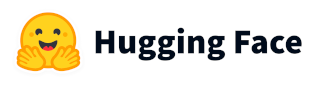

[Hugging Face](https://huggingface.co) is an open source AI startup that focuses on developing and providing state-of-the-art natural language processing (NLP) models and APIs for various applications. Its primary goal is to make NLP more accessible and user-friendly for developers, researchers, and businesses by offering pre-trained models, libraries, and easy-to-use interfaces.

The organization shares several open source models and libraries, in addition to offering cloud-based API services through their Model Hub. This allows users to deploy and use pre-trained models without worrying about infrastructure or deployment issues.

It functions as a collaborative platform where the AI community can share and reuse models, datasets, and code, resembling the "GitHub for AI."

Get a User Access Token on [Hugging Face](https://huggingface.co/settings/tokens) and create a free account if necessary.

Store your token in the `.env` file located in the same directory a your Jupyter Notebook, under the `HF_ACCESS_TOKEN` variable.

We then load the module and the environment variable.

In [ ]:
var dotenv = require("dotenv");
dotenv.config();

if (process.env.HF_ACCESS_TOKEN) console.log("API key loaded");

## Abstraction levels
There are several methods for interacting with Hugging Face APIs with varying degrees of abstraction. 

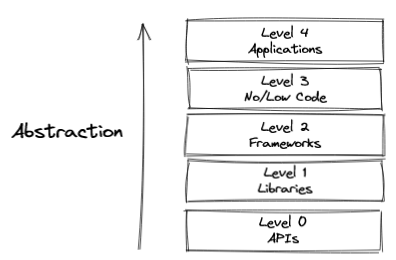

Let's visit the three first levels.

## Level 0 -  Simple API calls

In this tutorial we will use the [Falcon 7B Instruct](https://huggingface.co/tiiuae/falcon-7b-instruct) model.

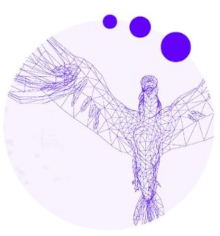

### Inference

Let's start with a simple Inference API call by using a standard `fetch` Node.js function.

In [20]:
var HFmodel = "tiiuae/falcon-7b-instruct";

async function query(data) {
    var response = await fetch(`https://api-inference.huggingface.co/models/${HFmodel}`,
        {
            headers: { Authorization: `Bearer ${process.env.HF_ACCESS_TOKEN}`, "Content-type": "application/json" },
            method: "POST",
            body: JSON.stringify(data),
        }
    );
    var result = await response.json();
    return result;
}

var input = { "inputs": "Say hello in Thaï" };

query(input).then((res) => {
    console.log(JSON.stringify(res[0].generated_text));
});

Promise { <pending> }

"Say hello in Thaïland\nIn Thaïland, it is common to greet people with a \"wai\" gesture, which is similar to a bow. It is also common to use the Thai greeting \"kha\" to say hello."


### Embeddings

Let's use the [BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5) embedding model hosting and Hugging Face to vectorize input text in semantic vectors.

In [21]:
async function query(data) {
    var response = await fetch("https://api-inference.huggingface.co/models/BAAI/bge-small-en-v1.5",
        {
            headers: { Authorization: `Bearer ${process.env.HF_ACCESS_TOKEN}`, "Content-type": "application/json" },
            method: "POST",
            body: JSON.stringify(data),
        }
    );
    var result = await response.json();
    return result;
}

var input = {"inputs": "The TechSquad is a DevRel initiative by Worldline"};

query(input).then((res) => {
    console.log(res);
});

Promise { <pending> }

[
    0.004250716883689165,    0.026168283075094223, -0.0049650222063064575,
    -0.05024654045701027,      0.0790230855345726,   -0.07896564900875092,
    -0.02659708447754383,     0.09812675416469574,   -0.05479635298252106,
   -0.060062065720558167, 0.000027653906727209687,   0.004625878296792507,
    0.050791118294000626,   -0.001986343879252672,    0.03557702526450157,
    -0.05701823905110359,   -0.005163461435586214,   -0.05082649737596512,
    0.012403772212564945,    0.015287453308701515,    0.04620764032006264,
    -0.04724935442209244,    0.017688242718577385,   -0.06338370591402054,
  -0.0022644943092018366,    0.032960619777441025,   0.007310505025088787,
    -0.08403147757053375,      0.0261639766395092,   -0.09908487647771835,
   -0.026010703295469284,   -0.055538032203912735,   0.014058911241590977,
     0.05377991124987602,    -0.01138332486152649,  0.0032367445528507233,
     0.02726053074002266,    -0.02478535659611225,  -0.012232761830091476,
   -0.02699411846697330

## Level 1 - Using the Hugging Face client Node.js library

Let's use the Hugging Face Inference library from NPM.

### Text Completion

In [22]:
var { HfInference } = require("@huggingface/inference");

var inference = new HfInference(process.env.HF_ACCESS_TOKEN);

async function callPredict() {
  var res = await inference.textGeneration({
    model: "tiiuae/falcon-7b-instruct",
    inputs: "Say hello in Japanese."}
  )
  console.log(JSON.stringify(res.generated_text));
}

callPredict();

Promise { <pending> }

"Say hello in Japanese.\nKonnichiwa!"


### Embeddings

In [23]:
async function callPredict() {
  var res = await inference.featureExtraction({
    model: "BAAI/bge-small-en-v1.5",
    inputs: "The TechSquad is a DevRel initiative by Worldline"}
  )
  console.log(res);
}

callPredict();

Promise { <pending> }

[
    0.004250716883689165,    0.026168283075094223, -0.0049650222063064575,
    -0.05024654045701027,      0.0790230855345726,   -0.07896564900875092,
    -0.02659708447754383,     0.09812675416469574,   -0.05479635298252106,
   -0.060062065720558167, 0.000027653906727209687,   0.004625878296792507,
    0.050791118294000626,   -0.001986343879252672,    0.03557702526450157,
    -0.05701823905110359,   -0.005163461435586214,   -0.05082649737596512,
    0.012403772212564945,    0.015287453308701515,    0.04620764032006264,
    -0.04724935442209244,    0.017688242718577385,   -0.06338370591402054,
  -0.0022644943092018366,    0.032960619777441025,   0.007310505025088787,
    -0.08403147757053375,      0.0261639766395092,   -0.09908487647771835,
   -0.026010703295469284,   -0.055538032203912735,   0.014058911241590977,
     0.05377991124987602,    -0.01138332486152649,  0.0032367445528507233,
     0.02726053074002266,    -0.02478535659611225,  -0.012232761830091476,
   -0.02699411846697330

## Level 2 - Using the LangChain framework

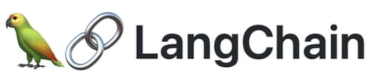

We now use the [LangChain](https://js.langchain.com/) framework to call Hugging Face APIs.

### Text Completion

In [24]:
var { HuggingFaceInference } = require("langchain/llms/hf");

var model = new HuggingFaceInference({
  model: "tiiuae/falcon-7b-instruct",
  apiKey: process.env.HF_ACCESS_TOKEN, 
});

async function callPredict() {
  var res = await model.call("How do you say hello in Spanish?");
  console.log(res);
}

callPredict();

Promise { <pending> }


In Spanish, 'hello' is 'hola'.


### Embeddings API

In [25]:
var { HuggingFaceInferenceEmbeddings } = require("langchain/embeddings/hf");

var embeddings = new HuggingFaceInferenceEmbeddings({
  model: "BAAI/bge-small-en-v1.5",
  apiKey: process.env.HF_ACCESS_TOKEN, 
});

async function callEmbedding() {
  var res = await embeddings.embedQuery("The TechSquad is a DevRel initiative by Worldline");
  console.log(res);
}

callEmbedding();

Promise { <pending> }

[
    0.004250716883689165,    0.026168283075094223, -0.0049650222063064575,
    -0.05024654045701027,      0.0790230855345726,   -0.07896564900875092,
    -0.02659708447754383,     0.09812675416469574,   -0.05479635298252106,
   -0.060062065720558167, 0.000027653906727209687,   0.004625878296792507,
    0.050791118294000626,   -0.001986343879252672,    0.03557702526450157,
    -0.05701823905110359,   -0.005163461435586214,   -0.05082649737596512,
    0.012403772212564945,    0.015287453308701515,    0.04620764032006264,
    -0.04724935442209244,    0.017688242718577385,   -0.06338370591402054,
  -0.0022644943092018366,    0.032960619777441025,   0.007310505025088787,
    -0.08403147757053375,      0.0261639766395092,   -0.09908487647771835,
   -0.026010703295469284,   -0.055538032203912735,   0.014058911241590977,
     0.05377991124987602,    -0.01138332486152649,  0.0032367445528507233,
     0.02726053074002266,    -0.02478535659611225,  -0.012232761830091476,
   -0.02699411846697330

### Simple RAG implementation

Now let's use LangChain to implement the RAG pattern and put to use these 384-dimension vectors!

I set the `returnSourceDocuments` parameter to *true* to get more details on the documents used by Falcon to make its response.

In [27]:
var { MemoryVectorStore } = require ("langchain/vectorstores/memory");
var { PDFLoader } = require("langchain/document_loaders/fs/pdf");
var { RetrievalQAChain } = require("langchain/chains");

async function getPDFCompletion() {
  //Load our local PDF document
  var loader = new PDFLoader("TechSquad.pdf");
  var docs = await loader.load();
    
  //Create a vector store from the embeddings
  var vectorStore = await MemoryVectorStore.fromDocuments(
    docs,
    embeddings
  );
    
  // Create a chain that uses the LLM and our vector store
  var chain = RetrievalQAChain.fromLLM(
    model, 
    vectorStore.asRetriever(),
    { returnSourceDocuments: true }
  );
    
  var res = await chain.call({
    query: "What are the ambition and objectives of the TechSquad?"
  });
    
  console.log(res);
}

getPDFCompletion();

Promise { <pending> }

{
  text: '\n' +
    "The TechSquad's ambition is to be the go-to team for technical excellence at Worldline. Their objectives include:\n" +
    '\n' +
    "1. To ensure that Worldline's technical expertise is at the cutting edge of the industry.\n" +
    "2. To increase Worldline's technical visibility and reputation as a leading payment technology provider.\n" +
    "3. To enhance Worldline's technical capabilities by providing training and development opportunities for their technical experts.\n" +
    "4. To increase Worldline's",
  sourceDocuments: [
    Document {
      pageContent: 'Technology & Operations / GRS\n' +
        'September 2023\n' +
        'TechSquad\n' +
        'General presentation',
      metadata: [Object]
    },
    Document {
      pageContent: "Amplify Worldline's Technical Excellence\n" +
        'to the World\n' +
        'Our \n' +
        'Ambition\n' +
        '#\n' +
        'Tech\n' +
        'At\n' +
        'Worldline',
      metadata: [Object]
   

## Level 3 - No-code with Flowise

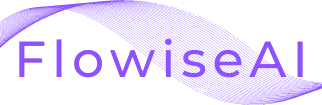

Let's finish this tutorial by visiting level 3 of abstraction with the [Flowise](https://github.com/FlowiseAI/Flowise) no-code solution to graphically design and configure LangChain workflows

Because this tutorial is about Hugging Face I deployed the Flowise container in a Hugging Face Space
Please refer to a previous epidode of this tutorial series for further installation details.

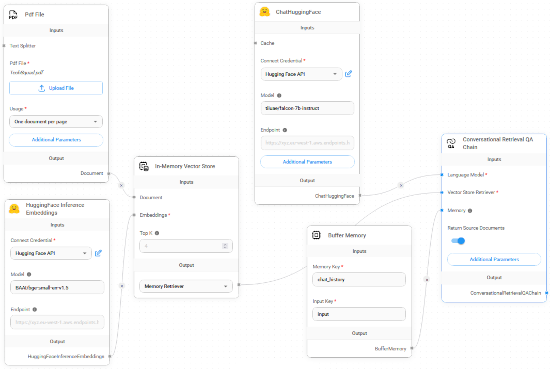

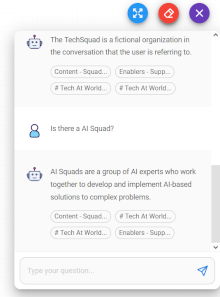

Ok time to end this tutorial. 

Hugging Face models can also be executed locally but that's a subject for several tutorial to come...

## Thank you!